# posonly
- a. Fully observed case
    - we have access to t-labels for training
- t labels:
    - true labels, the labels that we know for sure.

Test error:  2.380952380952381  %


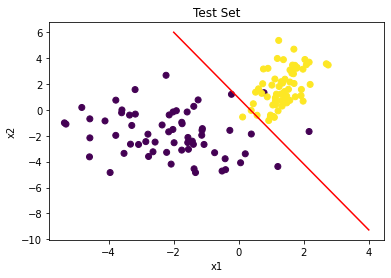

Test error:  11.904761904761903  %


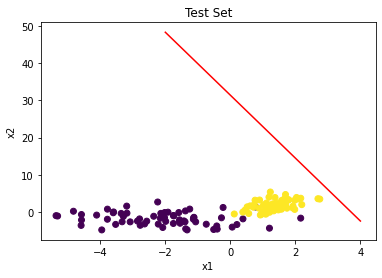

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import util
import sys

sys.path.append('../linearclass')

### NOTE : You need to complete logreg implementation first!

from logreg import LogisticRegression

# Character to replace with sub-problem letter in plot_path/save_path
WILDCARD = 'X'


def main(train_path, valid_path, test_path, save_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on t-labels,
        2. on y-labels,
        3. on y-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        save_path: Path to save predictions.
    """
    output_path_true = save_path.replace(WILDCARD, 'true')
    output_path_naive = save_path.replace(WILDCARD, 'naive')
    output_path_adjusted = save_path.replace(WILDCARD, 'adjusted')

    # *** START CODE HERE ***
    # Part (a): Train and test on true labels
    # train on t labels -> true labels 
    
    # ******* Train on train set.***********
    x_train, t_train = util.load_dataset(train_path, label_col='t', add_intercept=True)
    t_train = t_train.reshape(len(t_train), 1)
    clf = LogisticRegression()
    clf.fit(x_train, t_train)
    
    # ********Make prediction on test set.****
    x, t = util.load_dataset(test_path, label_col='t', add_intercept=True)
    t = t.reshape(len(x), 1)
    t_probs = clf.predict(x)
    
    # ******** Report Error from the test set**
    valid_error = LogisticRegression.calculate_logistic_loss(t, t_probs)
    print("Test error: ", valid_error, " %")

    # *********plot the test set - t labels***************
    theta = clf.theta
    a = np.arange(-2,5)
    b = np.divide(np.subtract(np.negative(theta[0]), np.multiply(theta[1], a)),theta[2])
    plt.scatter(x[:, 1], x[:, 2], c=t)
    plt.plot(a, b, 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Test Set')
    plt.show()
    
    # Make sure to save predicted probabilities to output_path_true using np.savetxt()
    np.savetxt(save_path, t_probs)
    
    
    # Part (b): Train on y-labels and test on true labels
    # *** TRAIN ON train set using the y- train labels
    x_train, y_train = util.load_dataset(train_path, label_col='y', add_intercept=True)
    y_train = y_train.reshape(len(y_train), 1)
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    
    # ********Make prediction on test set.****
    x, y = util.load_dataset(test_path, label_col='y', add_intercept=True)
    y = y.reshape(len(y), 1)
    y_probs = clf.predict(x)
    
    # ******** Report Error from the test set**
    valid_error = LogisticRegression.calculate_logistic_loss(y, y_probs)
    print("Test error: ", valid_error, " %")
    
     # *********plot the test set - y labels***************
    theta = clf.theta
    a = np.arange(-2,5)
    b = np.divide(np.subtract(np.negative(theta[0]), np.multiply(theta[1], a)),theta[2])
    plt.scatter(x[:, 1], x[:, 2], c=t)
    plt.plot(a, b, 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Test Set')
    plt.show()
    
    # Make sure to save predicted probabilities to output_path_naive using np.savetxt()
    np.savetxt(save_path, y_probs)
    # Part (f): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to output_path_adjusted
    # *** END CODER HERE

if __name__ == '__main__':
    main(train_path='train.csv',
        valid_path='valid.csv',
        test_path='test.csv',
        save_path='posonly_X_pred.txt')


In [ ]:
()